# Importing Packages 

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

### Read & Analyse Data 

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.drop(['Name', 'Cabin','Ticket','Age'], axis=1, inplace=True)

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


## Plotting the Data 

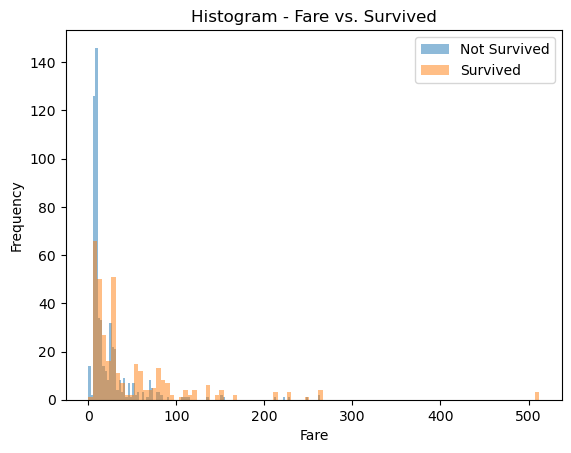

In [8]:
# Create the histogram
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=100, alpha=0.5, label='Not Survived')
plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=100, alpha=0.5, label='Survived')

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram - Fare vs. Survived')
plt.legend()

# Display the plot
plt.show()

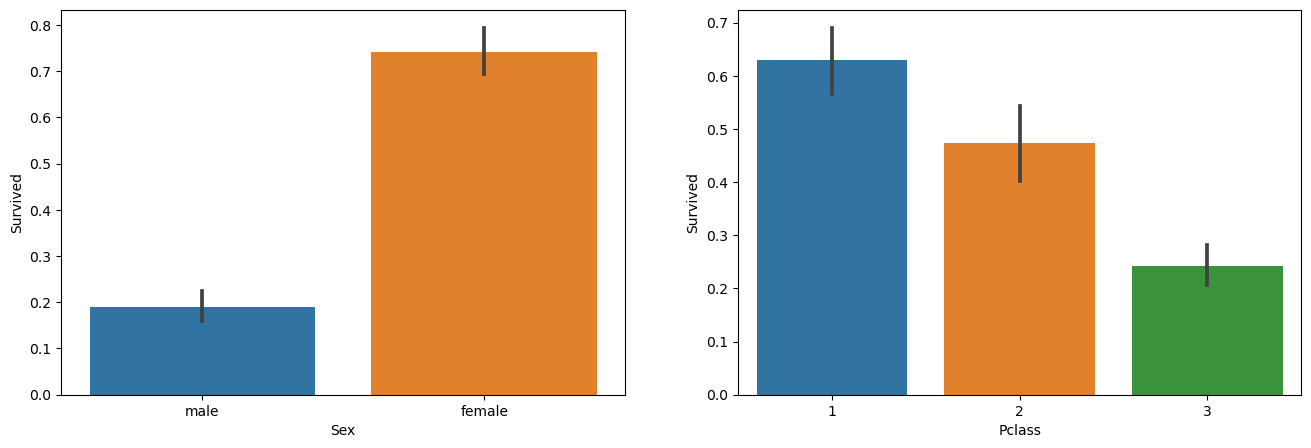

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(data = train_data , y = 'Survived' , x ='Sex' )
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.subplot(1,2,2)
sns.barplot(data = train_data , y = 'Survived' , x ='Pclass' );
plt.xlabel('Pclass')
plt.ylabel('Survived');


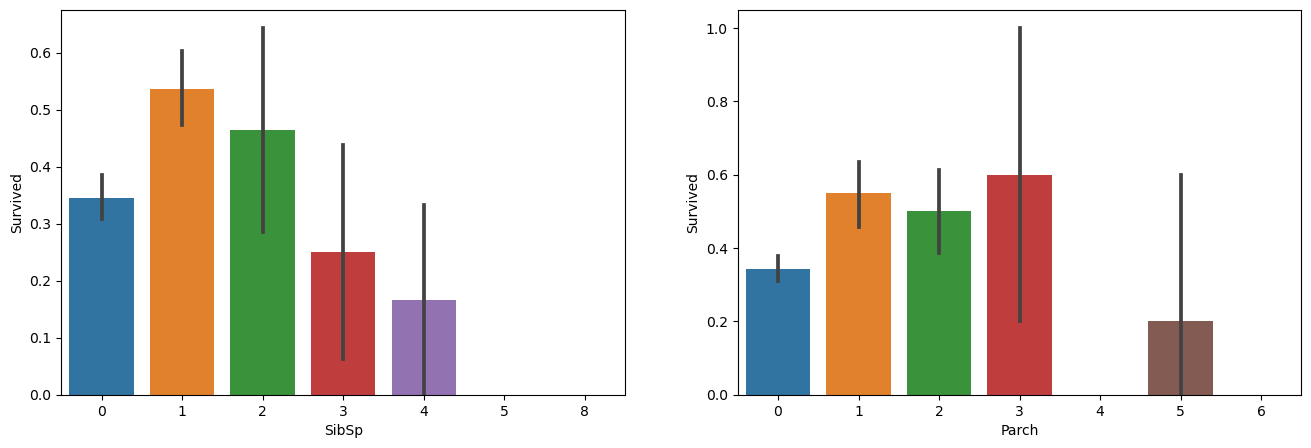

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(data = train_data , y = 'Survived' , x ='SibSp' )
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.subplot(1,2,2)
sns.barplot(data = train_data , y = 'Survived' , x ='Parch' );
plt.xlabel('Parch')
plt.ylabel('Survived');

Text(0, 0.5, 'Survived')

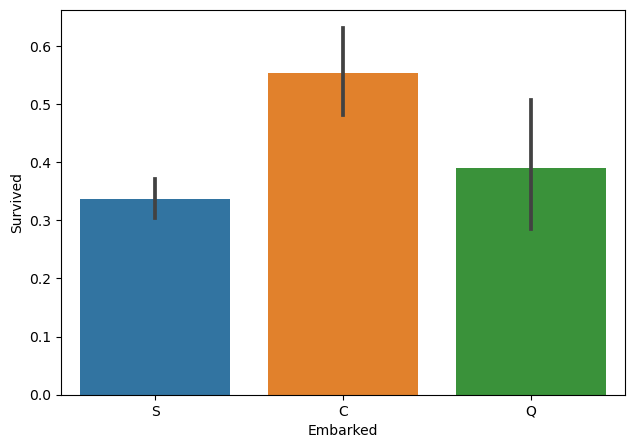

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(data = train_data , y = 'Survived' , x ='Embarked' )
plt.xlabel('Embarked')
plt.ylabel('Survived')

# Normalization & Encoding 

In [12]:
X = train_data[['PassengerId','Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',]]
y = train_data['Survived']

In [13]:
train_data.dropna(subset=['Embarked'], inplace=True)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Pclass       891 non-null    int64 
 2   Sex          891 non-null    object
 3   SibSp        891 non-null    int64 
 4   Parch        891 non-null    int64 
 5   Embarked     889 non-null    object
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [15]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'].astype(str))

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_3820\2232127342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_3820\2232127342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = le.fit_transform(X['Embarked'].astype(str))


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()
columns_to_scale = ['SibSp', 'Parch']

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 709 to 430
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Pclass       268 non-null    int64  
 2   Sex          268 non-null    int32  
 3   SibSp        268 non-null    float64
 4   Parch        268 non-null    float64
 5   Embarked     268 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 12.6 KB


# Linear Regression Model Implementation

In [19]:
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [32]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8097014925373134


In [36]:
confusion = metrics.confusion_matrix( y_test,y_pred )
confusion

array([[138,  19],
       [ 32,  79]], dtype=int64)

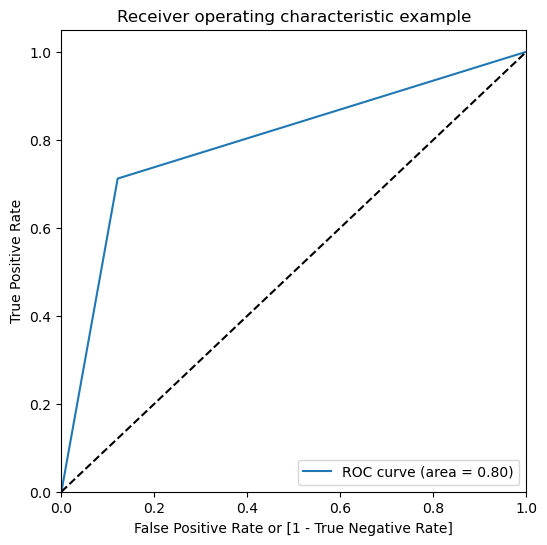

(array([0.        , 0.12101911, 1.        ]),
 array([0.        , 0.71171171, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [33]:
draw_roc(y_test, y_pred)

In [35]:
"{:2.2f}".format(metrics.roc_auc_score(y_test,y_pred))

'0.80'

In [22]:
import joblib
joblib.dump(model, 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']

In [23]:
import pandas as pd

# Read the test data from the CSV file
test_data = pd.read_csv('test.csv')
test_data.drop(['Name', 'Cabin', 'Ticket','Age'], axis=1, inplace=True)

In [24]:
X = test_data[['PassengerId','Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

In [25]:
test_data.dropna(subset=['Embarked'], inplace=True)

In [26]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'].astype(str))

In [27]:
import pandas as pd

mean_fare = X['Fare'].mean()
X['Fare'].fillna(mean_fare, inplace=True)


In [28]:
import joblib

# Load the logistic regression model
model = joblib.load('logistic_regression_model.joblib')

# Use the loaded model for prediction
predictions = model.predict(X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Fare


In [ ]:
# Create a DataFrame with predictions
output = pd.DataFrame({'PassengerID': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('predictions.csv', index=False)